In [22]:
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
dflojas = pd.read_csv("lojas.csv")
dftreino = pd.read_csv("dataset_treino.csv")
dfteste = pd.read_csv("dataset_teste.csv")

In [3]:
dftreino.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
dfteste.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [5]:
for idx in dfteste[dfteste.isna().values]['Open'].index:
    dfteste['Open'][idx] = dfteste['Promo'][idx]

In [6]:
dfteste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
Id               41088 non-null int64
Store            41088 non-null int64
DayOfWeek        41088 non-null int64
Date             41088 non-null object
Open             41088 non-null float64
Promo            41088 non-null int64
StateHoliday     41088 non-null object
SchoolHoliday    41088 non-null int64
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [7]:
dfteste[dfteste.isna().values]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday


(array([161.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   1.,   0.,   2.,   2.,  12.,  35.,  49.,  86.,
         93.,  81.,  79.,  76.,  65.,  58.,  31.,  30.,  23.,  19.,   6.,
          5.,   6.,   6.,   3.,   3.,   1.,   3.,   0.,   1.,   2.,   0.,
          0.,   0.,   0.,   1.,   0.,   1.]),
 array([   0. ,   22.6,   45.2,   67.8,   90.4,  113. ,  135.6,  158.2,
         180.8,  203.4,  226. ,  248.6,  271.2,  293.8,  316.4,  339. ,
         361.6,  384.2,  406.8,  429.4,  452. ,  474.6,  497.2,  519.8,
         542.4,  565. ,  587.6,  610.2,  632.8,  655.4,  678. ,  700.6,
         723.2,  745.8,  768.4,  791. ,  813.6,  836.2,  858.8,  881.4,
         904. ,  926.6,  949.2,  971.8,  994.4, 1017. , 1039.6, 1062.2,
        1084.8, 1107.4, 1130. ]),
 <a list of 50 Patch objects>)

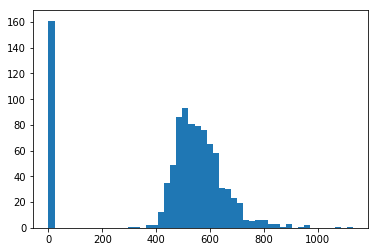

In [8]:
plt.hist(dftreino[dftreino[['Store','Customers']]['Store'] == 1]['Customers'], bins = 50)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f61a1b62c50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f61a1b6f8d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f61a1b62b00>],
 'medians': [<matplotlib.lines.Line2D at 0x7f61a1b6fdd8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f61a1b76588>],
 'means': []}

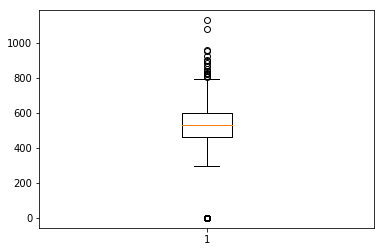

In [9]:
plt.boxplot(dftreino[dftreino[['Store','Customers']]['Store'] == 1]['Customers'])

In [10]:
print(statistics.stdev(dftreino[dftreino[['Store','Customers']]['Store'] == 1]['Customers']))
print(statistics.mean(dftreino[dftreino[['Store','Customers']]['Store'] == 1]['Customers']))
print(statistics.median(dftreino[dftreino[['Store','Customers']]['Store'] == 1]['Customers']))

228.9308497970017
467.64649681528664
529.0


In [11]:
dfteste.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [12]:
dictcustomers = {}
for idx in dftreino.index:
    store = dftreino.iloc[idx]['Store']
    if store in dictcustomers.keys():
        dictcustomers[store]['count'] += 1
        dictcustomers[store]['value'].append(dftreino.iloc[idx]['Customers'])
    else:
        dictcustomers[store] = {'count': 1, 'value': [dftreino.iloc[idx]['Customers']]}

In [13]:
len(dictcustomers)

1115

In [14]:
dfcustomers = pd.DataFrame.from_dict(dictcustomers)
dfcustomers.head()

,1,2,3,4,5,6,7,8,9,10,...,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115
count,942,942,942,942,942,942,942,942,942,942,...,942,758,942,758,942,942,942,942,942,942
value,"[555, 546, 523, 560, 612, 0, 500, 459, 503, 46...","[625, 601, 727, 646, 638, 0, 316, 468, 521, 65...","[821, 823, 716, 818, 768, 0, 412, 607, 655, 60...","[1498, 1276, 1258, 1191, 1379, 0, 1219, 1108, ...","[559, 539, 658, 598, 650, 0, 228, 485, 455, 50...","[589, 541, 542, 576, 582, 0, 306, 454, 442, 40...","[1414, 1116, 1166, 1158, 1340, 0, 705, 1062, 1...","[833, 882, 698, 695, 841, 0, 398, 558, 783, 62...","[687, 651, 625, 678, 777, 0, 468, 546, 579, 53...","[681, 556, 518, 593, 662, 0, 475, 603, 579, 60...",...,"[618, 577, 544, 580, 650, 0, 340, 530, 577, 44...","[825, 712, 748, 795, 852, 0, 625, 609, 590, 56...","[645, 614, 550, 721, 818, 0, 207, 502, 505, 43...","[515, 466, 500, 543, 622, 0, 325, 452, 471, 39...","[642, 510, 509, 544, 644, 0, 339, 446, 473, 44...","[422, 439, 403, 493, 515, 0, 188, 362, 346, 36...","[767, 728, 709, 713, 946, 0, 567, 596, 566, 55...","[720, 716, 589, 584, 684, 0, 517, 639, 710, 51...","[3745, 3251, 3545, 3456, 3468, 0, 3242, 3286, ...","[538, 502, 473, 500, 608, 0, 478, 417, 435, 38..."


In [15]:
dfcustomers.T.to_csv('customers.csv')

In [16]:
dfCustom = pd.read_csv('customers.csv')
dfCustom.columns = ['Store', 'count', 'value']
dfCustom.head()

,Store,count,value
0,1,942,"[555, 546, 523, 560, 612, 0, 500, 459, 503, 46..."
1,2,942,"[625, 601, 727, 646, 638, 0, 316, 468, 521, 65..."
2,3,942,"[821, 823, 716, 818, 768, 0, 412, 607, 655, 60..."
3,4,942,"[1498, 1276, 1258, 1191, 1379, 0, 1219, 1108, ..."
4,5,942,"[559, 539, 658, 598, 650, 0, 228, 485, 455, 50..."


In [17]:
dfCustom['Customers'] = np.zeros(len(dfCustom))

In [23]:
for idx in dfCustom.index:
    dfCustom['Customers'].iloc[idx] = statistics.median(map(int, ast.literal_eval(dfCustom.iloc[idx]['value'])))

In [24]:
dfCustom.head()

,Store,count,value,Customers
0,1,942,"[555, 546, 523, 560, 612, 0, 500, 459, 503, 46...",529.0
1,2,942,"[625, 601, 727, 646, 638, 0, 316, 468, 521, 65...",542.0
2,3,942,"[821, 823, 716, 818, 768, 0, 412, 607, 655, 60...",705.0
3,4,942,"[1498, 1276, 1258, 1191, 1379, 0, 1219, 1108, ...",1261.5
4,5,942,"[559, 539, 658, 598, 650, 0, 228, 485, 455, 50...",537.0


In [25]:
dfCustomCols = dfCustom[['Store', 'Customers']]
dfCustomCols.head()

,Store,Customers
0,1,529.0
1,2,542.0
2,3,705.0
3,4,1261.5
4,5,537.0


In [26]:
dfCustomCols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 2 columns):
Store        1115 non-null int64
Customers    1115 non-null float64
dtypes: float64(1), int64(1)
memory usage: 17.5 KB


In [27]:
dfCustomCols.describe()

,Store,Customers
count,1115.00000,1115.000000
mean,558.00000,713.139462
std,322.01708,342.824078
min,1.00000,206.000000
25%,279.50000,508.500000
50%,558.00000,634.000000
75%,836.50000,812.250000
max,1115.00000,3393.000000


In [28]:
dfcompeticao = pd.merge(dfteste, dfCustomCols, on = 'Store')
dfcompeticao.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Customers
0,1,1,4,2015-09-17,1.0,1,0,0,529.0
1,857,1,3,2015-09-16,1.0,1,0,0,529.0
2,1713,1,2,2015-09-15,1.0,1,0,0,529.0
3,2569,1,1,2015-09-14,1.0,1,0,0,529.0
4,3425,1,7,2015-09-13,0.0,0,0,0,529.0


In [29]:
for idx in dfcompeticao.index:
    dfcompeticao['Open'].iloc[idx] = int(dfcompeticao['Open'].iloc[idx])
    if dfcompeticao['Open'].iloc[idx] == 0:
        dfcompeticao['Customers'].iloc[idx] = 0

In [30]:
dfcompeticao.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Customers
0,1,1,4,2015-09-17,1.0,1,0,0,529.0
1,857,1,3,2015-09-16,1.0,1,0,0,529.0
2,1713,1,2,2015-09-15,1.0,1,0,0,529.0
3,2569,1,1,2015-09-14,1.0,1,0,0,529.0
4,3425,1,7,2015-09-13,0.0,0,0,0,0.0


In [31]:
def strToInt(x):
    if x == 0 or x == '0':
        return 0
    elif x == 'a':
        return 1
    elif x == 'b':
        return 2
    else:
        return 3

dftreino['StateHoliday'] = dftreino['StateHoliday'].apply(lambda x: strToInt(x))
dfcompeticao['StateHoliday'] = dfcompeticao['StateHoliday'].apply(lambda x: strToInt(x))

In [32]:
dftreino['Year'] = pd.to_datetime(dftreino['Date']).apply(lambda data: data.year)
dftreino['Month'] = pd.to_datetime(dftreino['Date']).apply(lambda data: data.month)
dftreino['Day'] = pd.to_datetime(dftreino['Date']).apply(lambda data: data.day)

dfcompeticao['Year'] = pd.to_datetime(dfcompeticao['Date']).apply(lambda data: data.year)
dfcompeticao['Month'] = pd.to_datetime(dfcompeticao['Date']).apply(lambda data: data.month)
dfcompeticao['Day'] = pd.to_datetime(dfcompeticao['Date']).apply(lambda data: data.day)

In [33]:
dftreino.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day'],
      dtype='object')

In [34]:
X = dftreino[['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day']]
y = dftreino['Sales']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
predicao = lm.predict(X_test)

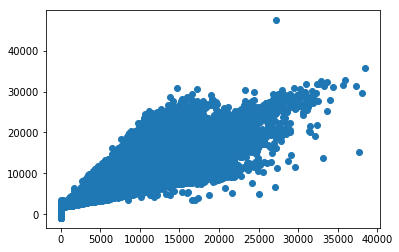

In [37]:
plt.scatter(y_test, predicao)

In [38]:
XComp = dfcompeticao[['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day']]

In [39]:
predicao_comp = lm.predict(XComp)

In [40]:
predicao_comp

array([6579.45672226, 6648.67807556, 6717.89942887, ..., 5844.24972829,
        159.25822482, 4205.75208308])

In [41]:
dfPredito = pd.DataFrame(predicao_comp)
dfPredito.index = np.arange(1, len(dfPredito)+1)
dfPredito.count()
dfPredito.to_csv('submissionEnhancedCustomerMedian.csv')